# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

%matplotlib inline
plt.style.use('seaborn')

# 設定 data_path
dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_train['Age'] = abs(app_train['DAYS_BIRTH'])/365

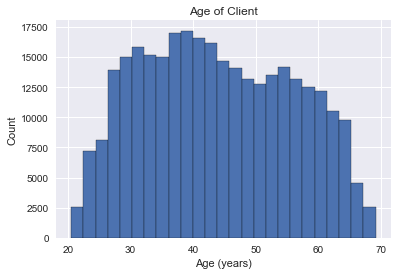

In [4]:
# Plot the distribution of ages in years
plt.hist(app_train['Age'], edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

C:\Users\TL_Yu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


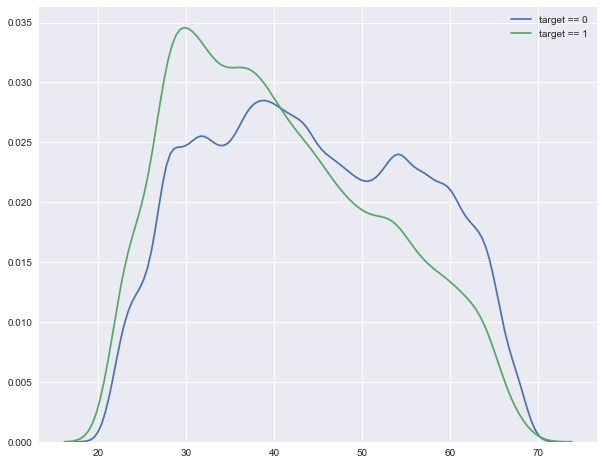

In [5]:
plt.figure(figsize=(10,8))
# Kernel Density Estimation(KDE) plot: 會準時還款者
sns.kdeplot(data = app_train.loc[app_train['TARGET']==0,'Age'], label = 'target == 0')
# KDE不准時還款者
sns.kdeplot(data = app_train.loc[app_train['TARGET']==1,'Age'], label = 'target == 1')

C:\Users\TL_Yu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


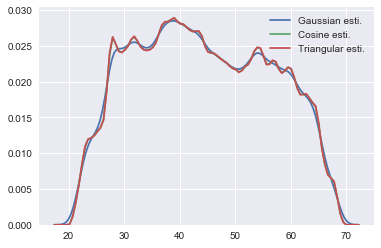

In [6]:
# KDE, 比較不同的 kernel function
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'Age'], label = 'Gaussian esti.', kernel='gau')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'Age'], label = 'Cosine esti.', kernel='cos')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'Age'], label = 'Triangular esti.', kernel='tri')
plt.show()

# 補充
[KDE](https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py)<br>[什麼是 KDE](https://blog.csdn.net/unixtch/article/details/78556499)

C:\Users\TL_Yu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


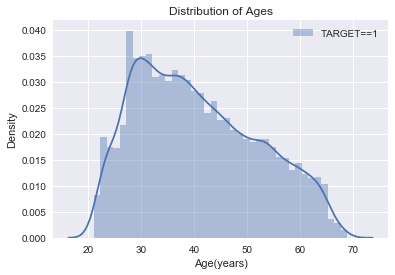

In [7]:
sns.distplot(app_train.loc[app_train['TARGET']==1,'Age'], label = 'TARGET==1')
plt.legend()
plt.xlabel('Age(years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.show()

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

In [19]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train.loc[:, ['TARGET', 'Age']] # subset

#自 20 到 70 歲，切 11 個點 (得到 10 組)
bin_cut = list(range(20, 75,5))
age_data['Age_BINNED'] = pd.cut(age_data['Age'], 
                                  bins = bin_cut) 

print(age_data['Age_BINNED'].value_counts())

(35, 40]    42868
(40, 45]    41406
(30, 35]    39440
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(25, 30]    32862
(60, 65]    27476
(20, 25]    12159
(65, 70]     8103
Name: Age_BINNED, dtype: int64


C:\Users\TL_Yu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


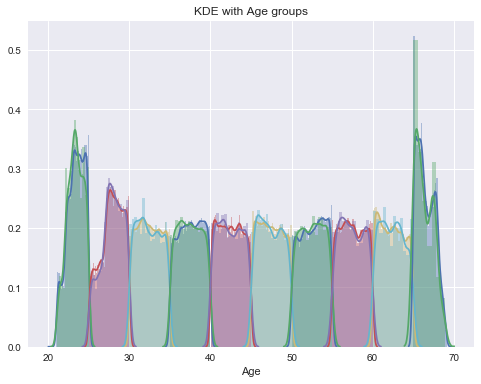

In [22]:
year_group_sorted = age_data.Age_BINNED.sort_values().unique()

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['Age_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'Age'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['Age_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'Age'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [28]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('Age_BINNED').mean()
age_groups

,TARGET,Age
Age_BINNED,,
"(20, 25]",0.123036,23.377522
"(25, 30]",0.111436,27.822518
"(30, 35]",0.102814,32.479037
"(35, 40]",0.089414,37.555913
"(40, 45]",0.078491,42.459346
"(45, 50]",0.074171,47.462741
"(50, 55]",0.066968,52.593136
"(55, 60]",0.055314,57.491131
"(60, 65]",0.052737,62.412459


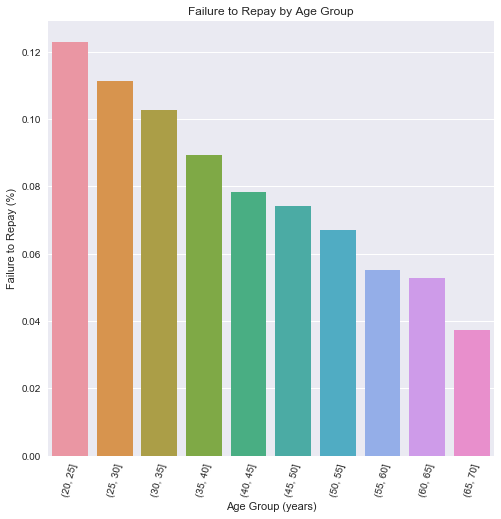

In [29]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot

px = age_groups.index
py = age_groups.TARGET
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');